In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
data.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

In [5]:
data.shape

(9879, 40)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
data.nunique()


gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [8]:
# df = data.loc[:,~data.columns.str.startswith('red')]
# plt.figure(figsize=(15,15))
# corrmat = df.corr()
# corrmat = np.tril(corrmat)
# corrmat[corrmat==0] = None
# corrmat = corrmat.round(1)
# labels = df.select_dtypes(include='number').columns.values
# f, ax = plt.subplots(figsize=(15, 8))
# sns.heatmap(corrmat, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
# plt.legend('')

# plt.show()

correlation = 1:
blueTotalGold and blueGoldPerMin because all games are exactly 10 minutes in and therefore goldpermin is just totalgold/10
same for totalminionskilled and cs/minute
lets remove the per minute attributes.
lets remove the gameid since it has no correllation to anything
wards placed, the values are very strange, being far too high, we suspect this column is incorrectly labelled and refers to vision score, which measures effectiveness of wards placed, and destroyed (+1 for each minute of ward lifetime gained and +1 for each minute of ward lifetime denied)
both sides have a gold and exp diff column, which are inverses of each other, therefore red diff attributes will be dropped.

Highest correlation to BlueWins:
Golddiff,Expdiff,Totalgold,Totalexp,Avglvl,Kills,Deaths

In [9]:
# fig , ax = plt.subplots(figsize=(25,25))
# ax = sns.heatmap(data.corr(), annot=True ,ax=ax, cmap="YlGnBu",linewidths = .5)
# ax.set_title("Correlation Between variables", fontsize=36)
# plt.show()

In [10]:
data.corr()["blueWins"].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

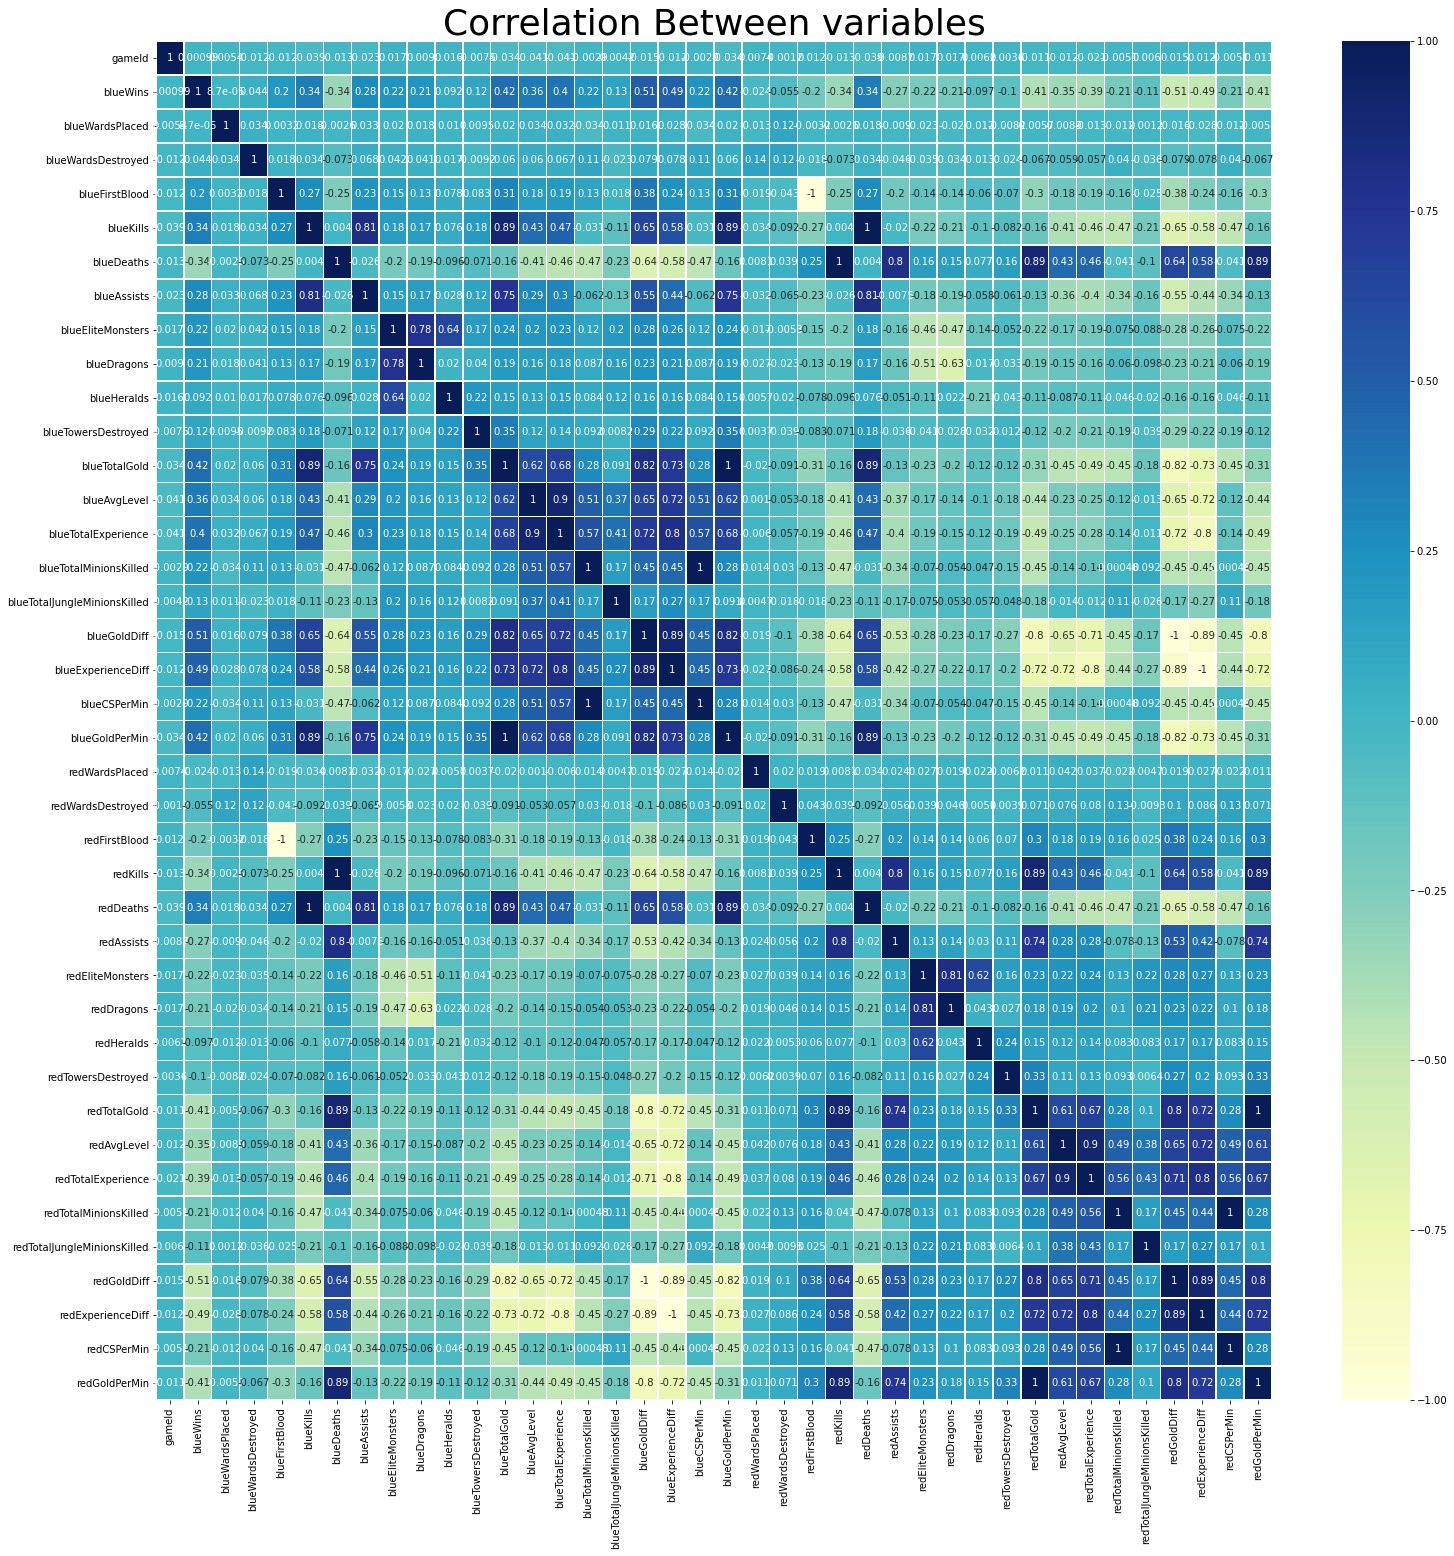

In [11]:
fig , ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(data.corr(), annot=True ,ax=ax, cmap="YlGnBu",linewidths = .5)
ax.set_title("Correlation Between variables", fontsize=36)
plt.show()

TODO:
scaling? 
cross validation setup -> Kfold?
lesa meira um pipeline og gridsearchCV
velja model types
gera modelly bois
evaluate the bois


In [12]:

data = pd.read_csv("high_diamond_ranked_10min.csv")
data.columns


Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [13]:
low_values = ['blueWardsPlaced','blueWardsDestroyed','blueKills',
              'blueDeaths','blueAssists','blueAvgLevel','blueTotalMinionsKilled',
              'blueTotalJungleMinionsKilled','redWardsPlaced','redWardsDestroyed',
              'redAssists','redAvgLevel','redTotalMinionsKilled',
              'redTotalJungleMinionsKilled']

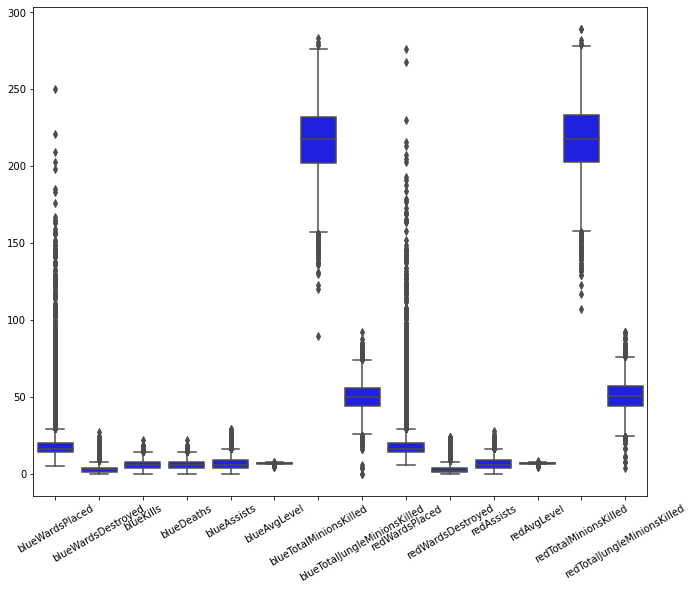

In [14]:
cleandata = data.drop(['redFirstBlood','redDeaths','redKills','redExperienceDiff','redGoldDiff','blueExperienceDiff','blueGoldDiff', 'gameId','redCSPerMin', 'redGoldPerMin','blueCSPerMin', 'blueGoldPerMin'], axis = 1)

cldatanowin = cleandata.drop('blueWins',axis=1)
plt.figure(figsize = (11,9))
g = sns.boxplot(data = cldatanowin[low_values], color = "blue")
plt.xticks(rotation = 30)
plt.show()

In [15]:
def drop_outliers(data,  standard_deviation:int,exceptions = []):
    stdevs:int = standard_deviation
    for column in data.columns:
        if column not in exceptions:
            data = data[(data[column] >= data[column].mean() - stdevs * data[column].std()) & (data[column] <= data[column].mean() + stdevs * data[column].std())]
    return data

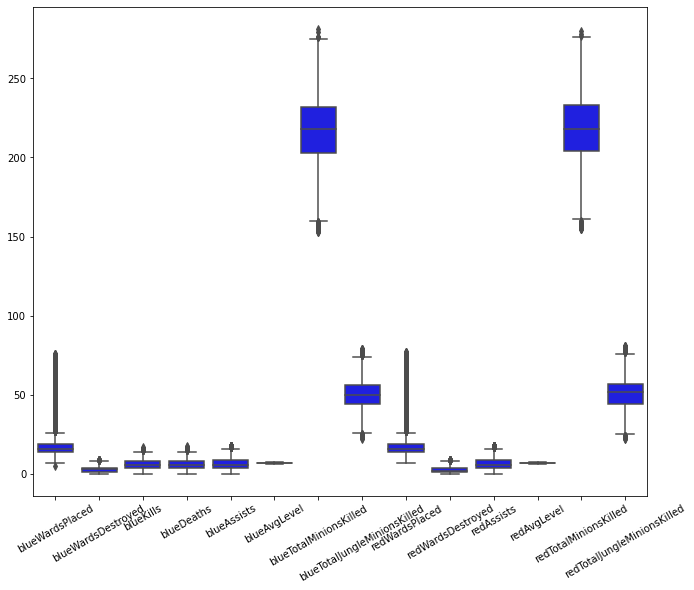

          blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
count  8609.000000      8609.000000         8609.000000     8609.000000   
mean      0.499710        19.631316            2.689279        0.503891   
std       0.500029        10.172409            1.685130        0.500014   
min       0.000000         5.000000            0.000000        0.000000   
25%       0.000000        14.000000            1.000000        0.000000   
50%       0.000000        16.000000            3.000000        1.000000   
75%       1.000000        19.000000            4.000000        1.000000   
max       1.000000        76.000000            9.000000        1.000000   

         blueKills   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
count  8609.000000  8609.000000  8609.000000        8609.000000  8609.000000   
mean      6.063887     6.034499     6.473923           0.547334     0.361598   
std       2.834558     2.781936     3.760153           0.623740     0.480491   
min 

In [16]:
cleandata = data.drop(['redFirstBlood','redDeaths','redKills','redExperienceDiff','redGoldDiff', 'gameId','redCSPerMin', 'redGoldPerMin','blueCSPerMin', 'blueGoldPerMin'], axis = 1)
cleandata = drop_outliers(cleandata, 3,['redTowersDestroyed', 'blueTowersDestroyed','redDragons', 'redHeralds','blueDragons', 'blueHeralds','blueEliteMonsters','redEliteMonsters','blueKills', 'blueDeaths'])
cleandata.describe()
plt.figure(figsize = (11,9))
g = sns.boxplot(data = cleandata[low_values], color = "blue")
plt.xticks(rotation = 30)
plt.show()
print(cleandata.describe())


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = cleandata.drop('blueWins', axis=1)
y = cleandata['blueWins']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
pipe = make_pipeline(DecisionTreeClassifier())
print(pipe.get_params().keys())
grid_parameters = [{
    "decisiontreeclassifier" : [DecisionTreeClassifier()],
    "decisiontreeclassifier__criterion" : ['gini', 'entropy'],
    "decisiontreeclassifier__max_depth" : [2,4,6,8,10,12],
    "decisiontreeclassifier__min_samples_split" : [2,4,6,8,10,12,14,16,18]
}]


clf_gridsearch = GridSearchCV(pipe, grid_parameters)
best_model = clf_gridsearch.fit(X_train, y_train)
print('Best Criterion:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__criterion'])
print('Best max_depth:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])
print('Best samples_split:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__min_samples_split'])
print()
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])


KeyboardInterrupt: 

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
pipe = make_pipeline(SelectKBest(chi2, k=1),DecisionTreeClassifier())
print(pipe.get_params().keys())
grid_parameters = [{
    "selectkbest"   : [SelectKBest()],
    "selectkbest__k" : [5,10,20,25],
    "decisiontreeclassifier" : [DecisionTreeClassifier()],
    "decisiontreeclassifier__criterion" : ['gini', 'entropy'],
    "decisiontreeclassifier__max_depth" : [2,4,6,8,10,12],
    "decisiontreeclassifier__min_samples_split" : [2,4,6,8,10,12,14,16,18]
}]


clf_gridsearch = GridSearchCV(pipe, grid_parameters, return_train_score=True)
best_model = clf_gridsearch.fit(X_train, y_train)
print('Best Criterion:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__criterion'])
print('Best max_depth:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])
print('Best samples_split:', clf_gridsearch.best_estimator_.get_params()['decisiontreeclassifier__min_samples_split'])
print('Best k in selectKBest:',clf_gridsearch.best_estimator_.get_params()['selectkbest__k'])
print()
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'decisiontreeclassifier', 'selectkbest__k', 'selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])
Best Criterion: entropy
Best max_depth: 4
Best samples_split: 2
Best k in selectKBest: 10

The mean accuracy of the model is: 0.7228029423151374


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_gridsearch, X_test,y_test, cv=5, scoring='f1_macro')

In [27]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.02


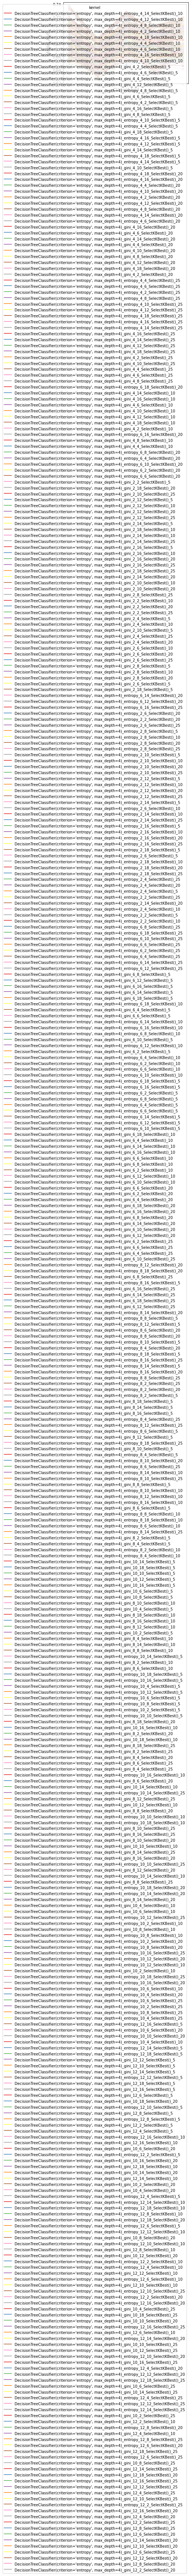

In [54]:
# plt.figure()
# plt.plot(grid_parameters[0]['selectkbest__k'], clf_gridsearch.cv_results_.keys)
results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]
model_scores = results_df.filter(regex=r'split\d*_test_score')
# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()
# print(f"Correlation of models:\n {model_scores.transpose().corr()}")

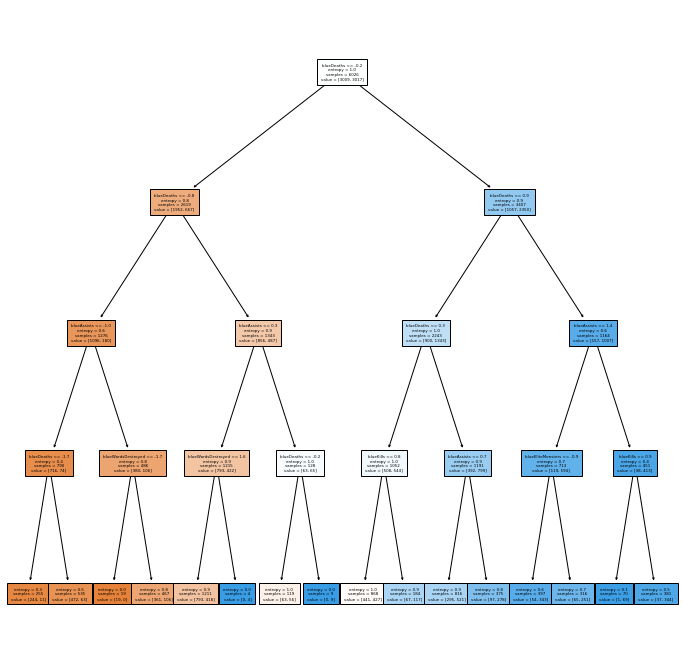

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(
    best_model.best_estimator_['decisiontreeclassifier'],
    feature_names=cleandata.columns,precision=1, filled=True, fontsize=4
    )
plt.savefig('treestonks', dpi = 100)
